https://github.com/mahakal001/reinforcement-learning/blob/master/rl-an-introduction/chapter02/10-armed-bandit-part-1.ipynb

https://blog.gofynd.com/multi-armed-bandit-solution-methods-e85e6b19fb2d

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
np.random.seed(777)

In [4]:
action_indices = np.arange(0,10)

In [5]:
# Sample true rewards from  normal ( not uniform ) distibution
mu = 0
sigma = 1
shape = (10)
true_rewards = np.random.normal(mu, sigma, shape)

In [6]:
true_rewards

array([-0.46820879, -0.82282485, -0.0653801 , -0.71336192,  0.90635089,
        0.76623673,  0.82605407, -1.32368279, -1.75244452,  1.00244907])

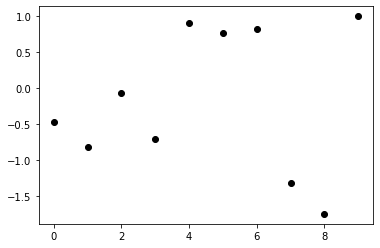

In [7]:
plt.plot(action_indices, true_rewards,'o', color='black')

In [8]:
# At runtime we will select rewards with true rewards as mean and unit variance normal distribution
# Lets Plot how it will look like
%time
runtime_rewards = np.array([ np.random.normal(true_reward,1,1000) for true_reward in true_rewards])
runtime_rewards[0]

Wall time: 0 ns


array([ 7.66006610e-02,  1.42695211e+00, -1.23756625e+00, -1.87130471e+00,
       -1.10067630e+00, -1.02708246e+00, -1.70144018e+00, -9.07712315e-01,
        4.46578466e-01, -2.03167864e-01, -1.85157895e+00,  2.17303010e-01,
       -1.21178794e-02, -9.29583057e-01, -3.73508489e-01, -2.01102040e+00,
        2.01116080e+00, -1.13420341e-02, -7.82081572e-01, -4.47171414e-01,
        4.92584367e-01, -4.09725897e-01, -9.14240963e-01, -1.49011654e-01,
        3.72959829e-01, -2.00097079e+00, -7.49793052e-01,  1.27624392e+00,
       -1.14244770e+00,  1.20192436e-01,  1.33615467e+00,  1.58804147e+00,
        9.86372889e-01, -6.06620486e-01, -1.25336911e-01, -1.19582728e+00,
       -1.87215489e+00, -1.70881999e+00, -9.11690961e-01, -5.15533956e-01,
        2.89475566e-01, -6.20294721e-01, -7.39487801e-01, -1.06804877e+00,
       -2.49511292e+00, -1.37866389e-01, -7.99039795e-01, -5.03150957e-01,
       -1.78460755e-01, -1.07447874e+00, -7.36613071e-01,  7.23268728e-01,
       -3.10595483e-01,  

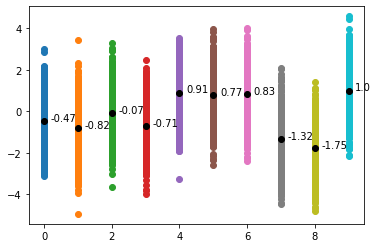

In [9]:
for index in action_indices :
    plt.scatter(np.full((1000),index),runtime_rewards[index])
    plt.text(index+0.2,true_rewards[index],str(round(true_rewards[index],2)))
plt.plot(action_indices, true_rewards,'o', color='black')
plt.show()

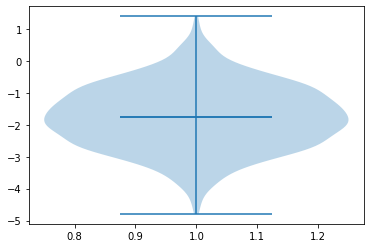

In [10]:

fig, ax = plt.subplots()
bp = ax.violinplot(runtime_rewards[8], showmeans=True, showmedians=True)
plt.show()

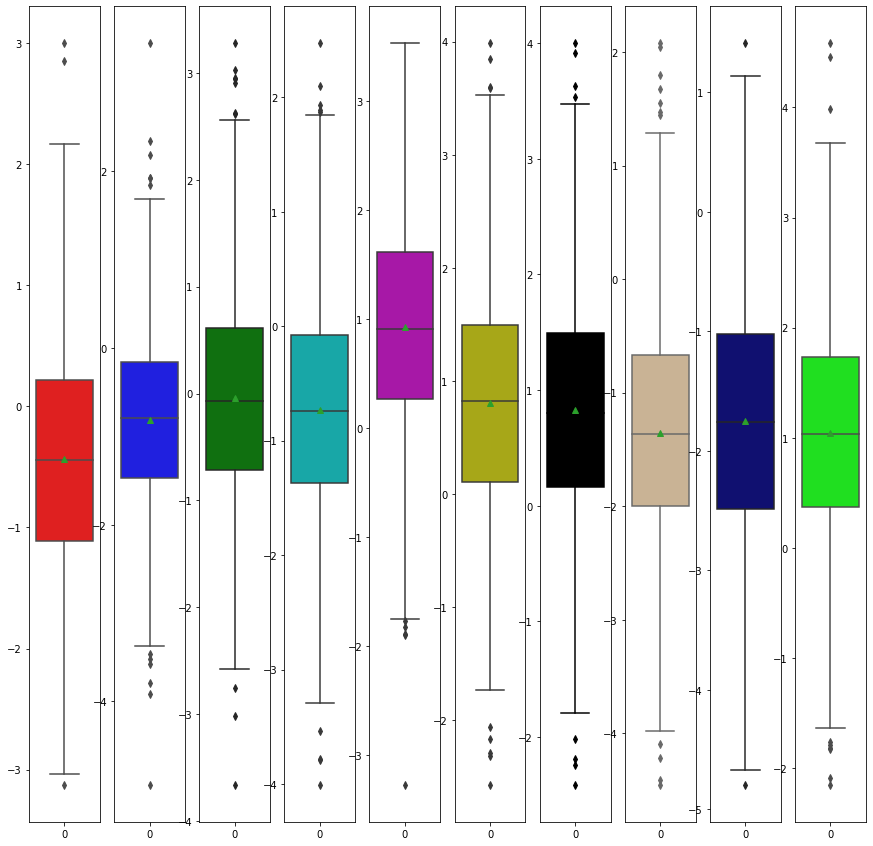

In [11]:
import seaborn as sns
fig, axes = plt.subplots(1, 10, figsize=[15, 15])
colors = ['r', 'b', 'g', 'c', 'm', 'y', 'k', 'tan', 'navy', 'lime']

for x in range(10):
    sns.boxplot(data=runtime_rewards[x], ax=axes[x], showmeans=True, color=colors[x])
    

In [12]:
# Produce a testbed of 2000 bandit problems
np.random.seed(10)
n_bandit = 2000
n_lever = 10
steps = 3000

testbed = np.random.normal(0,1,(n_bandit,n_lever))
reward_estimates = np.zeros((n_bandit,n_lever))
action_count = np.ones((n_bandit,n_lever))  # each lever is pulled atleast once
initial_reward_estimates =  np.random.normal(testbed,1)

In [ ]:
running_reward_sum = np.copy(reward_estimates) # _per_action_per_bandit

rewards_eps_01 = []
rewards_eps_01.append(0) 
rewards_eps_01.append(np.mean(initial_reward_estimates)) # step 1

epsilon = 0.1
for step in range(2,steps):
    reward_sum_over_all_bandits_per_step = 0
    for problem_index in range(n_bandit):  
        if np.random.random() > epsilon: # Greedy Selection
            maxval = np.amax(reward_estimates[problem_index])
            maxval_indices = np.ravel(np.array(np.where(reward_estimates[problem_index] == maxval)))
            random_choice = np.random.choice( maxval_indices ) # breaking ties randomly
        else :
             random_choice = np.random.randint(n_lever)
        
        #print(str(problem_index),str(step),str(random_choice))
        running_reward_sum[problem_index][random_choice] += np.random.normal(testbed[problem_index][random_choice],1)
        action_count[problem_index][random_choice] += 1         
        avg_reward = running_reward_sum[problem_index][random_choice] / action_count[problem_index][random_choice]
        reward_estimates[problem_index][random_choice] = avg_reward
        
        reward_sum_over_all_bandits_per_step += avg_reward
        
    rewards_eps_01.append((reward_sum_over_all_bandits_per_step)/n_bandit)

In [ ]:
plt.plot(np.arange(steps), rewards_eps_01, label=0.1, color='red')
plt.legend(loc=2, ncol=2)
plt.show()

In [ ]:
def rewards_per_step(steps, n_bandit, n_lever, testbed, initial_reward_estimates, epsilon):
    reward_estimates = np.zeros((n_bandit,n_lever))
    action_count = np.ones((n_bandit,n_lever))  # each lever is pulled atleast once
    running_reward_sum = np.copy(reward_estimates) # _per_pull_per_bandit

    avg_rewards_per_step = []
    avg_rewards_per_step.append(0) 
    avg_rewards_per_step.append(np.mean(initial_reward_estimates)) # step 1

    for step in range(2,steps):
        reward_sum_over_all_bandits_per_step = 0
        for problem_index in range(n_bandit):  
            if np.random.random() > epsilon:
                maxval = np.amax(reward_estimates[problem_index])
                maxval_indices = np.ravel(np.array(np.where(reward_estimates[problem_index] == maxval)))
                random_choice = np.random.choice( maxval_indices )
            else :
                 random_choice = np.random.randint(n_lever)

            #print(str(problem_index),str(step),str(random_choice))
            running_reward_sum[problem_index][random_choice] += np.random.normal(testbed[problem_index][random_choice],1)
            action_count[problem_index][random_choice] += 1         
            avg_reward = running_reward_sum[problem_index][random_choice] / action_count[problem_index][random_choice]
            reward_estimates[problem_index][random_choice] = avg_reward

            reward_sum_over_all_bandits_per_step += avg_reward

        avg_rewards_per_step.append((reward_sum_over_all_bandits_per_step)/n_bandit)
            
    return avg_rewards_per_step

In [ ]:
np.random.seed(10)
n_bandit = 2000
n_lever = 10
steps = 1000

testbed = np.random.normal(0,1,(n_bandit,n_lever))
initial_reward_estimates =  np.random.normal(testbed,1)

In [ ]:
%%time
epsilon_list = [0.0, 0.01, 0.1]
color_list = ['g','r','b']

plt.figure(figsize=(10,10))
plt.xlabel('Steps', fontsize=18)
plt.ylabel('Average Reward', fontsize=16)

for index,eps in enumerate(epsilon_list):
    avg_rewards_per_step = rewards_per_step(steps, n_bandit, n_lever, testbed, initial_reward_estimates, eps)
    plt.plot(np.arange(steps),avg_rewards_per_step, label=eps, color=color_list[index])
    
plt.legend(loc=2, ncol=2)
plt.show()